# About Dataset

Набор данных для прогнозирования диабета представляет собой коллекцию медицинских и демографических данных пациентов, а также информацию об их диабетическом статусе (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, заболевания сердца, история курения, уровень HbA1c и уровень глюкозы в крови.

# 1. Формулировка задачи и цели исследования

Задачей данного исследования является построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их медицинской истории и демографической информации. 

Целью исследования является выявление взаимосвязи между различными медицинскими и демографическими факторами и вероятность развития диабета.

# 2. Определение метрик и критериев успеха

2.1. Метрики классификации

- Accuracy (точность) — доля правильных предсказаний (подверженных риску).
- Precision (точность предсказаний класса целевого) — насколько верны предсказания о том, что возможен диабет.
- Recall (полнота класса целевого) — насколько хорошо модель выявляет всех пациентов группы риска.
- F1-score — гармоническое среднее precision и recall, учитывающее баланс между ними.
- ROC-AUC — общая способность модели различать целевой класс, независимо от выбранного порога.

2.2. Критерии успеха

- Минимальная точность (Accuracy): ≥ 0.8
- F1-score для класса «Pass»: ≥ 0.75
- ROC-AUC: ≥ 0.8 — подтверждает способность модели различать больных и здоровых.

Модель считается успешной, если одновременно достигает удовлетворительных значений указанных метрик и позволяет интерпретировать влияние ключевых признаков на итоговый результат.

# 3. Загрузка и первичный осмотр данных

In [142]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1


In [143]:
import pandas as pd

# Создание датасета
# "C:\Users\user\.cache\kagglehub\datasets\iammustafatz\diabetes-prediction-dataset\versions\1"

# Use the full path to your data file
file_path = "C:/Users/user/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1/diabetes_prediction_dataset.csv" 

# Read the data into a DataFrame
df = pd.read_csv(file_path)

# df = df_origin.copy()
# Посмотрим структуру
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [144]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='str')

In [145]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  str    
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  str    
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), str(2)
memory usage: 6.9 MB


In [146]:
# целевая переменная
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [147]:
# категории истории курения
df.smoking_history.unique()

<StringArray>
['never', 'No Info', 'current', 'former', 'ever', 'not current']
Length: 6, dtype: str

In [148]:
# категории пол
df.gender.unique()

<StringArray>
['Female', 'Male', 'Other']
Length: 3, dtype: str

Датасет содержит 100000 наблюдений и 8 признаков,
- `diabetes` целевая переменная бинарная с сильным дисбалансом, представлена в числовом виде виде и указывает на наличие болезни.
- `gender` строковая категориальная пременная содержит три категории *male*, *female* а также *other*, эта категория  отражает качество данных,а не характеристику пациента.
- `smoking_history` строковая категориальная переменная, содержит шесть категорий, *No info*, эта категория также отражает качество данных, а не медицинский фактор.
- `age, bmi, HbA1c_level`, вещественные числа - возраст, индекс массы тела и содержание сахара в крови.
- `hypertension, heart_disease`, бинарные - гипертония, болезни сердца
- `blood_glucose_level`, целочисленные значения - уровень глюкозы в крови.

>Пропущенные значения в датасете отсутствуют, что свидетельствует о его высокой степени готовности к дальнейшему анализу и построению модели без необходимости дополнительной очистки данных.

Данные имеют сильный дисбаланс классов 91500 здоровых 8500 больных, это нужно будет учесть при проведении анализа и выборе метода машинного обучения.

# 4. Exploratory Data Analysis (EDA):

### 4.1 оценка дисбананса классов

In [149]:
# данные
data = {'diabetes': [0, 1], 'count': [91500, 8500]}
df_counts = pd.DataFrame(data)

print("Абсолютные значения:")
print(df_counts)
print("\n" + "="*40)

# Расчет процентов
total = df_counts['count'].sum()
df_counts['percentage'] = (df_counts['count'] / total * 100).round(2)

print("С процентным распределением:")
print(df_counts)
print("\n" + "="*40)
print(f"Всего наблюдений: {total}")
print(f"Соотношение классов: {8500/91500:.3f}")
print(f"Дисбаланс: {max(91500, 8500)/min(91500, 8500):.1f}:1")

Абсолютные значения:
   diabetes  count
0         0  91500
1         1   8500

С процентным распределением:
   diabetes  count  percentage
0         0  91500        91.5
1         1   8500         8.5

Всего наблюдений: 100000
Соотношение классов: 0.093
Дисбаланс: 10.8:1


**Ключевые выводы:**
- Дисбаланс 10.76:1 - критически высокий
- Класс 1 (диабет): только 8.5% данных
- Accuracy бесполезна - модель, всегда предсказывающая "нет диабета", будет иметь accuracy 91.5%
- Фокус на Recall для класса 1 - важно выявить как можно больше случаев диабета
- Обязательно использовать методы борьбы с дисбалансом
- Рассмотреть использование **Precision-Recall AUC** вместо **ROC-AUC**

## 4.2 Распределение данных

In [150]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Описание признаков:

**Возраст (age)**
- Средний возраст: 41.9 года, медиана — 43 года
- Диапазон значений: от 0.08 до 80 лет
- Распределение достаточно широкое, присутствуют как дети, так и пожилые пациенты

**Артериальная гипертензия (hypertension)**
- Бинарный признак (0/1)
- Среднее значение: 0.075, то есть около 7.5% пациентов имеют гипертонию

**Сердечно-сосудистые заболевания (heart_disease)**
- Бинарный признак
- Присутствует у ~3.9% пациентов
- Большинство наблюдений относятся к классу «нет заболевания»

**Индекс массы тела (bmi)**
- Среднее значение: 27.3, что соответствует избыточному весу
- 50% значений лежат в диапазоне 23.6 – 29.6
- Максимум 95.7 указывает на наличие выбросов, которые стоит дополнительно проверить

**Уровень HbA1c (HbA1c_level)**
- Среднее: 5.53, медиана — 5.8
- Диапазон: 3.5 – 9.0
- Значения выше 6.5 клинически связаны с диабетом, что делает признак высокоинформативным

**Уровень глюкозы в крови (blood_glucose_level)**
- Среднее значение: 138 мг/дл, медиана — 140
- Диапазон: 80 – 300
- Высокая вариативность (std ≈ 40.7), признак потенциально один из ключевых для предсказания диабета

### 4.2.1 Количественные признаки

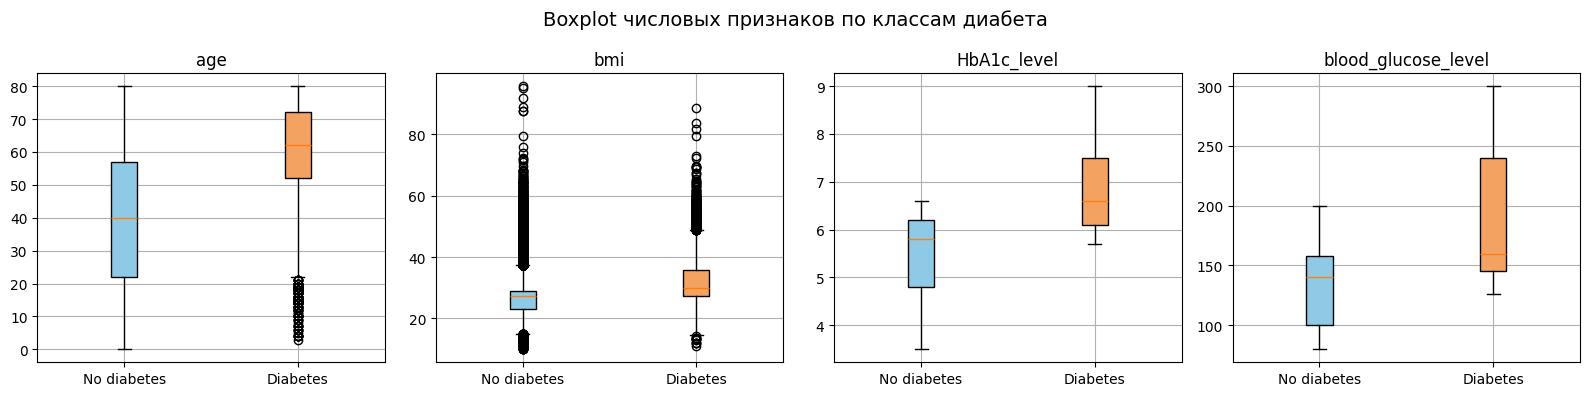

In [151]:
import matplotlib.pyplot as plt

# features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
numerical_features = [
    "age",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level"
]

fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

for ax, feature in zip(axes, numerical_features):
    data = [
        df[df["diabetes"] == 0][feature].dropna(),
        df[df["diabetes"] == 1][feature].dropna()
    ]
    
    box = ax.boxplot(
        data,
        tick_labels=["No diabetes", "Diabetes"],
        patch_artist=True,
        showfliers=True
    )
    
    # цвета для классов
    colors = ["#8ecae6", "#f4a261"]
    for patch, color in zip(box["boxes"], colors):
        patch.set_facecolor(color)
    
    ax.set_title(feature)
    ax.set_xlabel("")
    ax.grid()

fig.suptitle("Boxplot числовых признаков по классам диабета", fontsize=14)
plt.tight_layout()
plt.show()


**Возраст (age)**

- У пациентов без диабета медианный возраст составляет около 40 лет
- У пациентов с диабетом медиана смещена к ~60–62 годам
- Межквартильный размах у класса diabetes = 1 заметно выше в старших возрастах

>**Вывод:** возраст является значимым фактором риска, диабет чаще встречается у более возрастных пациентов.

**Индекс массы тела (bmi)**

- В обоих классах наблюдается большое количество выбросов, особенно в сторону высоких значений
- Медиана bmi:
  - без диабета — около 26
  - с диабетом — около 29
- Распределение у диабетиков смещено вправо, чаще встречается ожирение

>**Вывод:** bmi демонстрирует связь с диабетом, однако наличие выбросов указывает на необходимость:

- робастных моделей
- либо предварительной обработки (клиппинг, лог-преобразование)
- Уровень HbA1c (HbA1c_level)
- Чёткое разделение между классами:
  - diabetes = 0: медиана ~5.7
  - diabetes = 1: медиана ~6.6
- У диабетиков большая часть значений выше клинического порога 6.5

>**Вывод:** HbA1c_level — один из самых информативных признаков, хорошо разделяющий классы.

**Уровень глюкозы в крови (blood_glucose_level)**

- У пациентов без диабета медиана около 140
- У пациентов с диабетом — около 160, при этом верхние значения достигают 300
- Существенно больший разброс и выраженная правосторонняя асимметрия у диабетиков

>**Вывод:** признак обладает высокой дискриминативной способностью, но содержит экстремальные значения.

**Общие выводы по боксплотам**
- Признаки age, HbA1c_level и blood_glucose_level демонстрируют явные различия между классами
- bmi также связан с диабетом, но характеризуется большим числом выбросов
- Наблюдается хорошая separability классов, особенно по биохимическим показателям

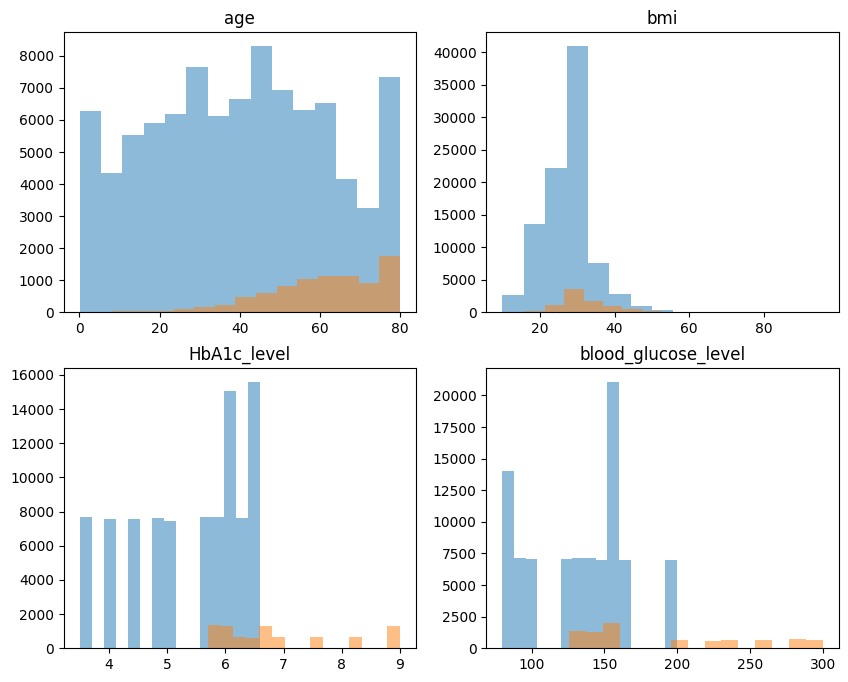

In [152]:
numerical_features_ = [
    ["age", "bmi"],
    ["HbA1c_level","blood_glucose_level"]
]

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for row in range(2):
    for col in range(2):
        ax[row, col].hist(df[df["diabetes"] == 0][numerical_features_[row][col]],
                          alpha=0.5,
                          bins=15,
                          label=numerical_features_[row][col])
        ax[row, col].set_title(numerical_features_[row][col])
        # ax[row, col].set_xlabel('Частота')
        ax[row, col].hist(df[df["diabetes"] == 1][numerical_features_[row][col]],
                          alpha=0.5,
                          bins=15,
                          label=numerical_features_[row][col])
        ax[row, col].set_title(numerical_features_[row][col])


**Возраст (age)**
- Распределение пациентов без диабета охватывает весь диапазон возрастов, с наибольшей плотностью в интервале 20–50 лет
- Для пациентов с диабетом распределение смещено в сторону старших возрастных групп (50–80 лет)
- В младших возрастах класс диабета представлен слабо

>**Вывод:** с увеличением возраста вероятность наличия диабета возрастает, что подтверждает клинические наблюдения.

**Индекс массы тела (bmi)**
- В обоих классах распределение имеет правостороннюю асимметрию
- У пациентов с диабетом чаще встречаются значения BMI > 30, соответствующие ожирению
- Наблюдается перекрытие классов в диапазоне 20–30, однако плотность диабетиков выше в правой части распределения

>**Вывод:** высокий BMI ассоциирован с повышенным риском диабета, но признак сам по себе не обеспечивает полного разделения классов.

**Уровень HbA1c (HbA1c_level)**
- Распределение пациентов без диабета сосредоточено преимущественно ниже 6.0
- Для диабетиков характерен сдвиг распределения вправо, с выраженным пиком выше 6.5
- Перекрытие классов минимально по сравнению с другими признаками

>**Вывод:** HbA1c_level является наиболее информативным признаком, хорошо разделяющим классы.

**Уровень глюкозы в крови (blood_glucose_level)**
- У пациентов без диабета распределение сосредоточено в диапазоне 90–150
- У пациентов с диабетом наблюдается более широкий диапазон значений и выраженный хвост высоких значений (до 300)
- Несмотря на заметное перекрытие классов, медианные значения у диабетиков выше

>**Вывод:** признак обладает высокой вариативностью и дополняет информацию, содержащуюся в HbA1c.

**Общие выводы по гистограммам**
- Все числовые признаки демонстрируют различия распределений между классами
- Наилучшую визуальную разделимость классов обеспечивают:
  - HbA1c_level
  - blood_glucose_level
- Признаки age и bmi усиливают модель в комбинации с биохимическими показателями
- Наблюдается перекрытие распределений, что подтверждает необходимость использования многопризнаковых моделей

### 4.2.2 Категориальные признаки

#### **smoking_history**

In [153]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

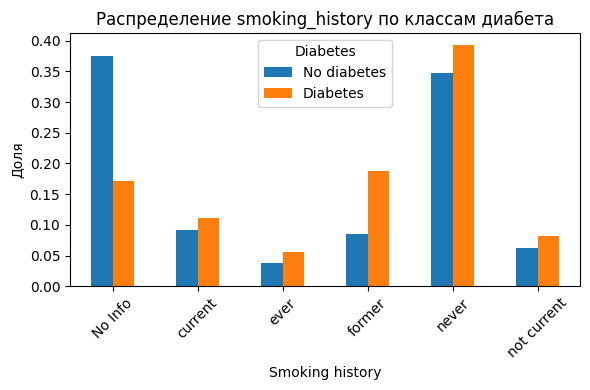

In [154]:
# доли внутри классов диабета

ct = (
    pd.crosstab(df["smoking_history"], df["diabetes"], normalize="columns")
)

ct.plot(kind="bar", figsize=(6, 4))

plt.title("Распределение smoking_history по классам диабета")
plt.xlabel("Smoking history")
plt.ylabel("Доля")
plt.legend(title="Diabetes", labels=["No diabetes", "Diabetes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ##### Основные наблюдения
**Категория No Info**

- Существенно чаще встречается у пациентов без диабета (~37%)
- У пациентов с диабетом доля значительно ниже (~17%)

Интерпретация:

Отсутствие информации о курении характерно преимущественно для не диабетиков и может быть связано с:
- неполнотой данных
- более редкими медицинскими обследованиями
Эта категория отражает качество данных и может быть рассмотрена ка пропущенные значения.

**Категория never**

- Наиболее распространённая категория в обоих классах
- Доля у пациентов с диабетом выше, чем у пациентов без диабета
Важно:
Это не означает, что «никогда не курившие чаще болеют диабетом», а отражает:

- возрастную структуру
- различия в распределении других факторов риска

**Категории former и current**

У пациентов с диабетом:

- заметно выше доля *former*
- немного выше доля *current*

Интерпретация:
Это согласуется с медицинскими наблюдениями:

- курение связано с метаболическими нарушениями
- отказ от курения (former) часто происходит после постановки диагноза

**Категории ever и not current**

- Представлены в меньших долях
- У диабетиков их доля стабильно выше

Интерпретация:
Эти категории указывают на факт курения в анамнезе, что потенциально связано с повышенным риском диабета.

##### Ключевые выводы для анализа

- Распределение *smoking_history* различается между классами диабета
- Категории, отражающие наличие курения в анамнезе, чаще встречаются у пациентов с диабетом
- Категория *No Info* является значимой и должна рассматриваться отдельно

##### Вывод для моделирования

- smoking_history — потенциально информативный категориальный признак
- Требует:
  - One-Hot Encoding
  - сохранения категории No Info
- Признак не является линейно разделяющим, но может:
  - улучшить модель в комбинации с биохимическими показателями

>Анализ категориального признака smoking_history показал различия в распределении статусов курения между пациентами с диабетом и без него. У пациентов с диабетом выше доля категорий, отражающих текущее или прошлое курение, тогда как категория No Info чаще встречается у пациентов без диабета. Полученные результаты указывают на потенциальную информативность признака при решении задачи классификации.

##### **gender, hypertension**

In [155]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

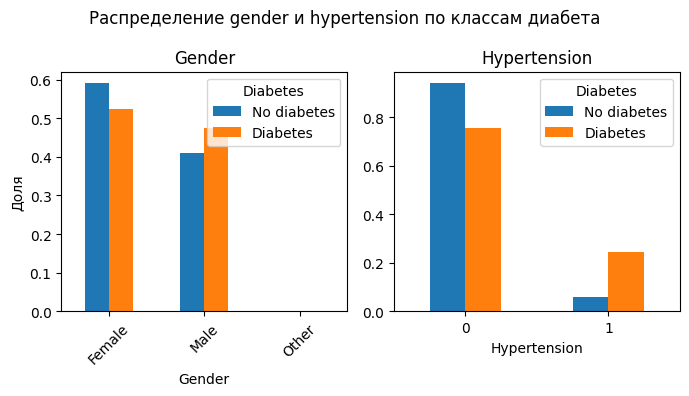

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# --- gender ---
ct_gender = pd.crosstab(
    df["gender"],
    df["diabetes"],
    normalize="columns"
)

ct_gender.plot(
    kind="bar",
    ax=ax[0]
)

ax[0].set_title("Gender")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Доля")
ax[0].legend(title="Diabetes", labels=["No diabetes", "Diabetes"])
ax[0].tick_params(axis="x", rotation=45)

# --- hypertension ---
ct_h = pd.crosstab(
    df["hypertension"],
    df["diabetes"],
    normalize="columns"
)

ct_h.plot(
    kind="bar",
    ax=ax[1]
)

ax[1].set_title("Hypertension")
ax[1].set_xlabel("Hypertension")
ax[1].set_ylabel("")
ax[1].legend(title="Diabetes", labels=["No diabetes", "Diabetes"])
ax[1].tick_params(axis="x", rotation=0)

fig.suptitle(
    "Распределение gender и hypertension по классам диабета",
    fontsize=12
)

plt.tight_layout()
plt.show()


In [157]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [158]:
df.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

#### Интерпретация распределений
##### **Признак gender**

Наблюдения:

- В категории female преобладают пациенты без диабета
- В категории male доля пациентов с диабетом выше
- Категория *other* содержит всего 18 наблюдений

Выводы:

- Пол связан с вероятностью наличия диабета
- Мужчины представлены среди диабетиков чаще, чем женщины
- Категория *other* статистически незначима из-за крайне малого объёма

Практическое решение:

- Признак можно использовать в модели
- Категорию other:
  - либо удалить
  - либо объединить с ближайшей категорией
  - либо оставить, если модель (деревья, бустинг) устойчива к редким классам

##### **Признак hypertension**

Наблюдения:

- Категория 0 (нет гипертонии) — самая массовая
  - в ней преобладают пациенты без диабета

- Категория 1 (есть гипертония)
  - в ней значительно выше доля пациентов с диабетом

Выводы:

- Наличие гипертонии сильно ассоциировано с диабетом
- Признак обладает высокой дискриминативной способностью
- Медицински обоснованный фактор риска

**Итоговая аналитическая интерпретация**

>Признак gender демонстрирует умеренную связь с наличием диабета: мужчины чаще представлены среди пациентов с диабетом, тогда как женщины преобладают среди пациентов без диабета.
Признак hypertension показывает выраженную зависимость от целевой переменной — наличие гипертонии существенно увеличивает долю пациентов с диабетом, что делает данный признак высокоинформативным для задачи классификации.

## 4.3 Корреляция
### 4.3.1 Количественные признаки
#### Корреляция с целевой переменной

In [159]:
# корреляция с целевой переменной
df[numerical_features].corrwith(df["diabetes"])


age                    0.258008
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
dtype: float64

df[numerical_features].corrwith(df["diabetes"])


**blood_glucose_level (0.42)**

- Самая сильная связь с диабетом
- Ожидаемо: показатель напрямую отражает уровень сахара
- Сильный индивидуальный предиктор
>ключевой признак, высокий feature importance почти в любой модели

**HbA1c_level (0.40)**

- Почти такая же сильная корреляция
- Отражает средний уровень глюкозы за длительный период
- Дополняет blood_glucose_level

>признак крайне информативен, возможна избыточность при использовании линейных моделей

**age (0.26)**

- Умеренная положительная связь
- Вероятность диабета растёт с возрастом

>полезный вспомогательный признак, может усиливаться во взаимодействиях (age × bmi)

**bmi (0.21)**

- Слабее, но всё ещё значимо
- Отражает влияние избыточной массы тела

>редко решает задачу в одиночку, полезен в комбинации с возрастом и гипертонией

**Вывод**

>Наибольшую корреляцию с наличием диабета демонстрируют показатели, напрямую связанные с уровнем сахара в крови (blood_glucose_level и HbA1c_level). Признаки age и bmi показывают умеренную положительную связь, что соответствует медицинским факторам риска и указывает на их вспомогательную роль в модели.

#### Корреляция между признаками /Heatmap

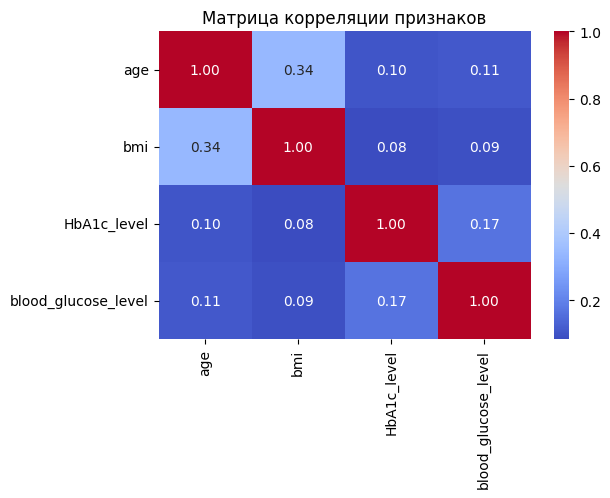

In [160]:
import seaborn as sns

corr = df[numerical_features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции признаков')
plt.show()

# |corr| > 0.7 → сильная корреляция
# |corr| > 0.9 → высокая мультиколлинеарность


##### Интерпретация по группам
**age ↔ bmi (0.34)**

- Умеренная положительная связь
- С возрастом ИМТ в среднем растёт
- Не критично, мультиколлинеарности нет

>оба признака можно спокойно использовать, линейные модели не пострадают

**HbA1c_level ↔ blood_glucose_level (0.17)**

- Корреляция слабая
- Несмотря на медицинскую близость, в данных они не дублируют друг друга

>можно и нужно оставлять оба признака, они отражают разные временные аспекты сахара:

- glucose — текущее состояние
- HbA1c — долгосрочное

##### Вывод

>В наборе данных отсутствует выраженная мультиколлинеарность между числовыми признаками. Даже показатели, связанные с уровнем сахара в крови (HbA1c_level и blood_glucose_level), демонстрируют слабую корреляцию, что позволяет использовать их одновременно без риска дублирования информации.

### 4.3.1 Категориальные признаки vs целевая переменная

#### Сделаем χ² и Cramér’s V вместе
##### χ²-тест

👉 отвечает на вопрос:
**«Есть ли зависимость между признаком и diabetes?»**

- H₀: зависимости нет

- p-value < 0.05 → зависимость статистически значима

##### Cramér’s V

👉 отвечает на вопрос:
**«Насколько сильна эта зависимость?»**

Потому что:

- χ² зависит от размера выборки

- Cramér’s V — нормированная мера силы связи

##### Шкала интерпретации Cramér’s V
| V         | Сила связи          |
| --------- | ------------------- |
| < 0.1     | очень слабая        |
| 0.1 – 0.3 | слабая / умеренная  |
| 0.3 – 0.5 | умеренная / сильная |
| > 0.5     | сильная             |


In [161]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(table)
    n = table.sum().sum()
    v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
    return chi2, p, v

In [162]:
# gender
chi2, p, v = cramers_v(df["gender"], df["diabetes"])
chi2, p, v


(np.float64(143.21825102550298),
 np.float64(7.953383718307458e-32),
 np.float64(0.03784418727169379))

In [163]:
# hypertension
chi2, p, v = cramers_v(df["hypertension"], df["diabetes"])
chi2, p, v


(np.float64(3910.708546826595),
 np.float64(0.0),
 np.float64(0.19775511489786035))

In [164]:
# smoking_history
chi2, p, v = cramers_v(df["smoking_history"], df["diabetes"])
chi2, p, v

(np.float64(1956.0944200848764),
 np.float64(0.0),
 np.float64(0.1398604454477704))


**gender**

- p-value ≪ 0.05 → зависимость статистически есть
- НО Cramér’s V = 0.038 → связь практически отсутствует

Практический смысл:

- значимость вызвана огромным размером выборки
- как предиктор:
  - слабый
  - полезен только в комбинациях
- категория other почти не влияет

**hypertension**

- p-value ≈ 0 → сильная уверенность
- V ≈ 0.20 → реально полезный признак

Практический смысл:

- один из лучших категориальных предикторов
- подтверждает медицинскую логику
- обязателен в модели

**smoking_history**

- p-value ≈ 0 → зависимость есть
- V ≈ 0.14 → слабая связь

Практический смысл:

- сам по себе слабый
- может:
  - улучшать модель немного
  - работать через взаимодействия (age × smoking)
- не ключевой 

##### 
>Несмотря на статистическую значимость всех категориальных признаков (p < 0.05), их практическая информативность существенно различается. Признак gender демонстрирует крайне слабую связь с наличием диабета (Cramér’s V = 0.038), что указывает на минимальный вклад в предсказание.
В то же время hypertension показывает наиболее выраженную связь с целевой переменной (V ≈ 0.20), а smoking_history — слабую, но потенциально полезную зависимость.

## 5. Preprocessing
### 5.1 Обработка сомнительных признаков

#### gender = other (18 наблюдений)

- Всего 18 строк → < 0.05% данных
- Cramér’s V = 0.038 → практически нулевая связь
- В OHE:
  - отдельный столбец с почти одними нулями
  - риск шума, особенно для линейных моделей

Решение:
- Удалить

In [165]:
# yдаление 
df = df[df["gender"] != "other"]

#### smoking_history = No Info

Что это такое

- Не категория поведения
- Пропущенная информация, замаскированная под категорию
- Часто несёт скрытый сигнал (люди не ответили)

Решение:
- Создать бинарный флаг

In [166]:
df["smoking_unknown"] = (df["smoking_history"] == "No Info").astype(int)

In [167]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_unknown
0,Female,80.0,0,1,never,25.19,6.6,140,0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1
2,Male,28.0,0,0,never,27.32,5.7,158,0,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0


### 5.2. Итоговый набор признаков

**Числовые:**

* age
* bmi
* HbA1c_level
* blood_glucose_level

**Категориальные:**

* gender (female, male)
* smoking_history (включая No Info)
* hypertension

**Дополнительно:**

* smoking_unknown

---

### 5.3 Предварительный выбор моделей

#### Базовая интерпретируемая модель

**Logistic Regression**

* One-Hot Encoding для категориальных признаков
* Хорошо интерпретируемые коэффициенты
* Подходит как baseline

#### Основная модель

**LightGBM / XGBoost**

* Устойчивы к слабым и нелинейным эффектам
* Хорошо работают с категориальными признаками
* Позволяют анализировать feature importance и SHAP

#### Альтернатива

**Random Forest**

* Менее чувствителен к масштабированию
* Хорош для проверки устойчивости результатов

---

### 5.4. Финальный вывод

Проведённый EDA позволил выявить наиболее информативные признаки, удалить шумовые категории и корректно обработать пропущенную категориальную информацию. Подготовленный набор данных оптимален для обучения как интерпретируемых линейных моделей, так и более мощных ансамблевых алгоритмов, что создаёт надёжную основу для дальнейшего моделирования и оценки качества.

# 6. Model

### Preprocessing pipeline (OHE + scaling)

Для корректной подготовки данных и предотвращения утечек информации используется `sklearn.Pipeline` и `ColumnTransformer`.

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Группы признаков
numerical_features = [
    "age",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level"
]

categorical_features = [
    "gender",
    "smoking_history",
    "hypertension"
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", drop="first"),
            categorical_features,
        ),
    ],
    remainder="passthrough"  # для smoking_unknown
)

* `StandardScaler` используется для числовых признаков (важно для линейных моделей)
* `OneHotEncoder`:

  * `drop='first'` уменьшает мультиколлинеарность
  * `handle_unknown='ignore'` защищает от новых категорий
* `smoking_unknown` передаётся напрямую как бинарный признак

## 6.1. Logistic Regression (baseline)

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logreg_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        (
            "model",
            LogisticRegression(
                max_iter=1000,
                class_weight="balanced",
                random_state=42,
            ),
        ),
    ]
)

# интерпретируемые коэффициенты
# хороший baseline
# чувствительна к масштабированию (поэтому scaler обязателен)

In [170]:
from sklearn.model_selection import train_test_split

# Признаки и целевая переменная
y = df['diabetes']
X = df.drop(columns=['diabetes'])

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [171]:
from sklearn.metrics import classification_report, roc_auc_score

logreg_pipeline.fit(X_train, y_train)

# Предсказание
y_pred_pipe = logreg_pipeline.predict(X_test)

# Оценка качества
print(classification_report(y_test, y_pred_pipe))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.88      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000

ROC-AUC: 0.8866466112314875


##### Интерпретация
- Очень хороший recall (88%)
- Но низкая precision (43%)
→ много ложноположительных
- ROC-AUC ≈ 0.887 — сильный baseline

**Что это значит:**
>Модель хорошо находит диабет,
но часто ошибается в сторону “ложной тревоги”.

## 6.2. LightGBM / Gradient Boosting (основная модель)

In [172]:
from lightgbm import LGBMClassifier

lgbm_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        (
            "model",
            LGBMClassifier(
                n_estimators=300,
                learning_rate=0.05,
                max_depth=-1,
                class_weight="balanced",
                random_state=42,
            ),
        ),
    ]
)

# устойчив к слабым признакам
# автоматически ловит нелинейности и взаимодействия
# позволяет анализировать feature importance и SHAP

In [173]:
lgbm_pipeline.fit(X_train, y_train)

# Предсказание
y_pred_pipe = lgbm_pipeline.predict(X_test)

# Оценка качества
print(classification_report(y_test, y_pred_pipe))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_pipe))

[LightGBM] [Info] Number of positive: 6792, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     18292
           1       0.52      0.90      0.66      1708

    accuracy                           0.92     20000
   macro avg       0.76      0.91      0.81     20000
weighted avg       0.95      0.92      0.93     20000

ROC-AUC: 0.9111813382797205


c:\Users\user\ANALYSIS\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##### Интерпретация

- Recall вырос до 90%
- Precision вырос с 0.43 → 0.52
- F1 вырос с 0.58 → 0.66
- ROC-AUC вырос с 0.887 → 0.911

>Это серьёзный прирост.

#### Сравнение моделей

| Метрика       | LogReg | LightGBM  | Победитель |
| ------------- | ------ | --------- | ---------- |
| ROC-AUC       | 0.887  | **0.911** | ✅ LGBM     |
| Recall (1)    | 0.88   | **0.90**  | ✅ LGBM     |
| Precision (1) | 0.43   | **0.52**  | ✅ LGBM     |
| F1 (1)        | 0.58   | **0.66**  | ✅ LGBM     |


**LightGBM выигрывает по всем ключевым метрикам.**

Это значит: 
- Есть нелинейности, 
- Есть взаимодействия признаков, 
- Простая линейная модель не раскрывает структуру полностью

>`[binary:BoostFromScore]: pavg=0.500000` 
class_weight="balanced" выровнял классы.

Сейчас используется стандартный threshold = 0.5.

Но:

- В медицине recall важнее accuracy
- Можно увеличить precision
- Можно сбалансировать recall / precision
- Можно минимизировать cost ошибок

## 6.2.1. Оптимизируем threshold

In [174]:
# Получаем вероятности (LightGBM)
import numpy as np
from sklearn.metrics import precision_recall_curve

proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

c:\Users\user\ANALYSIS\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [175]:
# Строим Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, proba)


###  Подбор оптимального threshold
##### Вариант A — максимум F1

In [176]:

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)

best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print("Best threshold:", best_threshold)
print("Best F1:", best_f1)

Best threshold: 0.8661425964456685
Best F1: 0.8120351540110111


##### Вариант B — фиксируем recall ≥ 0.95

In [177]:
idx = np.where(recall >= 0.95)[0]
best_idx = idx[np.argmax(precision[idx])]

best_threshold = thresholds[best_idx]
print("Threshold for recall >= 0.95:", best_threshold)

Threshold for recall >= 0.95: 0.3210764916260594


In [178]:


new_pred = (proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, new_pred))


              precision    recall  f1-score   support

           0       0.99      0.87      0.93     18292
           1       0.40      0.95      0.56      1708

    accuracy                           0.87     20000
   macro avg       0.70      0.91      0.74     20000
weighted avg       0.94      0.87      0.89     20000



#### Сравнение стратегий threshold

**A — максимум F1**
```Precision (1): 0.96
Recall (1): 0.70
F1: 0.81
Accuracy: 0.97
```

Что это означает

- Очень мало ложных тревог
- Но 30% диабета пропускаем
- Модель "строгая"

Это:

- хорошо для дорогой диагностики

- плохо для скрининга

**B — высокий recall (≥ 0.95)**
```Precision (1): 0.40
Recall (1): 0.95
F1: 0.56
Accuracy: 0.87
```

Что это означает

- Почти не пропускаем диабет
- Много ложных тревог
- Модель "чувствительная"

Это:

- отлично для первичного скрининга
- подходит для медицины

## 6.2.2 Стратегия поиска компромисса

Найти threshold, где:

- Recall ≥ 0.92
- среди них максимальный Precision

In [179]:
proba = lgbm_pipeline.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, proba)

# хотим recall >= 0.92
target_recall = 0.92

idx = np.where(recall >= target_recall)[0]

# выбираем среди них максимум precision
best_idx = idx[np.argmax(precision[idx])]

best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
print("Precision:", precision[best_idx])
print("Recall:", recall[best_idx])


c:\Users\user\ANALYSIS\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Best threshold: 0.4355672201399651
Precision: 0.458978102189781
Recall: 0.9203747072599532


In [180]:
# from sklearn.metrics import classification_report

new_pred = (proba >= best_threshold).astype(int)

print(classification_report(y_test, new_pred))


              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18292
           1       0.46      0.92      0.61      1708

    accuracy                           0.90     20000
   macro avg       0.73      0.91      0.78     20000
weighted avg       0.95      0.90      0.91     20000



- фиксируем минимально допустимый recall
- среди допустимых выбираем наиболее «чистую» модель
- не гонимся за F1
- не делаем экстремальный recall=0.95

### Сравнение всех трёх стратегий

| Стратегия       | Precision | Recall   | F1       | Accuracy | Смысл                     |
| --------------- | --------- | -------- | -------- | -------- | ------------------------- |
| A (F1 max)      | 0.96      | 0.70     | 0.81     | 0.97     | строгая                   |
| B (Recall≈0.95) | 0.40      | 0.95     | 0.56     | 0.87     | агрессивный скрининг      |
| **Компромисс**  | **0.46**  | **0.92** | **0.61** | **0.90** | сбалансированный скрининг |


### Почему это хороший баланс

- Пропускаем только 8% диабета (очень хорошо)
- Precision вырос с 0.40 → 0.46 (по сравнению с экстремальным recall)
- Accuracy всё ещё 0.90
- FP существенно меньше, чем в варианте B

Посмотрим на ошибки в числах

Поддержка:

- 1708 диабет
- 18292 без диабета
- Recall 0.92:
  - TP ≈ 1570
  - FN ≈ 138 ← пропущенные диабеты
- Precision 0.46:
  - Всего предсказано positive ≈ 1570 / 0.46 ≈ 3413
  - FP ≈ 3413 − 1570 ≈ 1843

##### Интерпретация

- Ловим почти весь диабет
- Отправляем ~3400 человек на доп. обследование
- Из них ~1800 окажутся здоровыми
- Для медицинского скрининга это нормально.

# 7. Финальные выводы
## 7.1. Факторы, связанные с диабетом
#### Числовые признаки (корреляция)
| Признак             | Корреляция с diabetes |
| ------------------- | --------------------- |
| blood_glucose_level | **0.42**              |
| HbA1c_level         | **0.40**              |
| age                 | 0.26                  |
| bmi                 | 0.21                  |

#### Вывод:

- Наибольшую связь с диабетом имеют показатели сахара крови и HbA1c.
- Возраст и BMI оказывают умеренное влияние.
- Это согласуется с медицинской логикой → данные выглядят реалистичными.

#### Категориальные признаки (χ² + Cramér’s V)
| Признак         | Cramér’s V | Сила связи       |
| --------------- | ---------- | ---------------- |
| hypertension    | **0.20**   | умеренная        |
| smoking_history | 0.14       | слабая–умеренная |
| gender          | 0.04       | очень слабая     |

#### Вывод:

- Гипертония — значимый фактор риска.
- Курение имеет влияние, но менее выраженное.
- Пол практически не влияет.

## 7.2. Модельные результаты
### LightGBM показал лучшие результаты:

- ROC-AUC: 0.91
- Хорошая способность разделять классы
- Лучше логистической регрессии

## 7.3 Оптимизация порога

Было протестировано три стратегии:
| Стратегия               | Precision | Recall   | Интерпретация             |
| ----------------------- | --------- | -------- | ------------------------- |
| Максимум F1             | 0.96      | 0.70     | Строгая модель            |
| Recall ≈ 0.95           | 0.40      | 0.95     | Агрессивный скрининг      |
| **Компромисс (выбран)** | **0.46**  | **0.92** | Сбалансированный скрининг |



## 7.4 Финальный выбранный режим

Recall ≈ 0.92
Precision ≈ 0.46
Accuracy ≈ 0.90

#### Интерпретация:

- Пропускается лишь ~8% случаев диабета

- Приемлемый уровень ложноположительных

- Подходит для первичного медицинского скрининга

# 8. Практические рекомендации
### 8.1 Для медицинского применения

- Использовать модель как инструмент предварительного отбора

- Направлять предсказанных positive на дополнительную диагностику

- Не использовать модель как окончательный диагноз

### 8.2 Для улучшения модели

1. Провести кросс-валидацию для стабильности оценки

2. Добавить калибровку вероятностей (Platt / isotonic)

3. Проверить SHAP-значения для интерпретируемости

4. Провести cost-sensitive анализ (стоимость FP vs FN)

### 8.3 Для бизнеса / страхования

Если цель — снижение затрат:

- Использовать более высокий threshold

- Повысить precision

- Снизить количество ложных тревог

## Итоговый вывод проекта

>Построена модель прогнозирования диабета с использованием LightGBM, демонстрирующая ROC-AUC 0.91. Порог классификации был адаптирован под задачу медицинского скрининга, что позволило достичь recall ≈ 0.92 при умеренном precision ≈ 0.46. Модель может использоваться как инструмент раннего выявления групп риска с последующим клиническим подтверждением.